In [320]:
import sys
# !{sys.executable} -m pip install lyricsgenius
# !{sys.executable} -m pip install spotipy
# !{sys.executable} -m pip install selenium
import pandas as pd
import requests
import urllib
from urllib.request import quote
import lyricsgenius
import spotipy
import spotipy.oauth2 as oauth2
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import json
import string
from random import *
import numpy as np
import nltk
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.io

In [321]:
genius_df = pd.read_csv('genius.csv')
spotify_df = pd.read_csv('spotify.csv')

In [322]:
genius_df.drop('Unnamed: 0', axis=1, inplace=True)
spotify_df.drop('Unnamed: 0', axis=1, inplace=True)

In [323]:
print(genius_df.shape)
genius_df.head()

(12343, 6)


,artist,song,album,lyrics,genius_id,genius_data
0,Żabson,DMT,To Ziomal,"['Ej,', 'ej', 'Życie', 'jest', 'jak', 'kalambu...",3480937,"{'_body': {'annotation_count': 18, 'api_path':..."
1,Żabson,Incepcja,To Ziomal,"['Kruszę', 'w', 'dłoni', 'stuff,', 'w', 'majtk...",3382127,"{'_body': {'annotation_count': 14, 'api_path':..."
2,Żabson,Księżniczki,To Ziomal,"['Dzisiaj', 'olewam', 'te', 'księżniczki', 'bo...",3199547,"{'_body': {'annotation_count': 3, 'api_path': ..."
3,Żabson,Czarne okulary,Passion Fruits EP,"['Zapomniałem', 'już', 'o', 'tamtych', 'snach'...",2451239,"{'_body': {'annotation_count': 18, 'api_path':..."
4,Żabson,Do ziomów,NieKumam,"['Geezy,', 'Geezy', 'O', 'swoje', 'szczęście',...",666753,"{'_body': {'annotation_count': 16, 'api_path':..."


In [324]:
print(spotify_df.shape)
spotify_df.head()

(5510, 24)


,artist,song,album,lyrics,genius_id,spotify_id,spotify_track_data,spotify_audio_data,featured_artists,track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Achille Lauro,Ulalala,Ragazzi madre,"['Mamma', 'fa', 'la', 'casalinga', '(Ulalala)'...",2896500,2NTxalkIR7Yz1nl5iIFWAz,"{'album': {'album_type': 'album', 'artists': [...","[{'danceability': 0.688, 'energy': 0.656, 'key...","['Boss Doms', 'Gemitaiz']",64,...,0.0,-5.487,0.0,0.0757,0.2880,0.000000,0.1200,0.570,111.043,4.0
1,Achille Lauro,Cenerentola,Ragazzi madre (1 Year Anniversary),"['Amore!', 'Si,ciao', 'ho', 'fatto', 'questo',...",2396650,0CHAAuryUJDzzpKmsyT9eP,"{'album': {'album_type': 'album', 'artists': [...","[{'danceability': 0.389, 'energy': 0.711, 'key...",['Boss Doms'],50,...,6.0,-7.426,0.0,0.0577,0.0112,0.000000,0.0991,0.318,81.206,4.0
2,Achille Lauro,La Bella E La Bestia,Young Crazy - EP,"['Giuro', 'con', 'te', 'avevo', ""l'impressione...",2038232,6pdLyZy6tBN6EAtBegiEKx,"{'album': {'album_type': 'single', 'artists': ...","[{'danceability': 0.577, 'energy': 0.638, 'key...",[],39,...,6.0,-7.411,0.0,0.0811,0.0300,0.000341,0.1010,0.338,84.126,4.0
3,Achille Lauro,Non Sei Come Me,Non sei come me,"['Non', 'sei', 'come', 'me', 'Esci', 'il', 've...",3334807,7wwljVtXMpKMLIIxxHzUaq,"{'album': {'album_type': 'single', 'artists': ...","[{'danceability': 0.681, 'energy': 0.786, 'key...",['Boss Doms'],55,...,2.0,-5.641,1.0,0.0344,0.1570,0.000000,0.1720,0.501,88.997,4.0
4,Achille Lauro,Ora Lo So,Dio c'è,"[""L'ho"", 'capito', 'prima', 'La', 'vita', 'è',...",2025302,62pKXsRHgqhtGaqTQeDOga,"{'album': {'album_type': 'album', 'artists': [...","[{'danceability': 0.345, 'energy': 0.875, 'key...",['Marracash'],41,...,7.0,-4.206,1.0,0.1300,0.0159,0.000005,0.2240,0.512,81.366,4.0


In [299]:
df = spotify_df[['spotify_id', 'track_popularity', 'energy', 'danceability']]
df.set_index('spotify_id', inplace=True)
df.head()

,track_popularity,energy,danceability
spotify_id,,,
2NTxalkIR7Yz1nl5iIFWAz,64,0.656,0.688
0CHAAuryUJDzzpKmsyT9eP,50,0.711,0.389
6pdLyZy6tBN6EAtBegiEKx,39,0.638,0.577
7wwljVtXMpKMLIIxxHzUaq,55,0.786,0.681
62pKXsRHgqhtGaqTQeDOga,41,0.875,0.345


In [300]:
ks = range(2, 11)
distortions = []

for k in ks:
    km = KMeans(k, n_init=30)
    km.fit(df)
    distortions.append(km.inertia_)

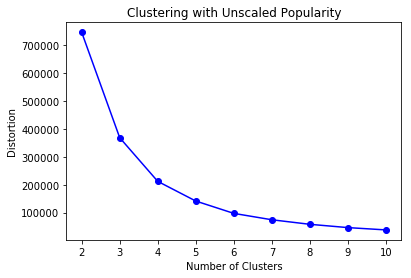

In [301]:
plt.plot(ks, distortions, c='blue', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Clustering with Unscaled Popularity')
plt.show()

In [302]:
km = KMeans(4)
km.fit(df)
for i in range(0, 4):
    print('Cluster', i, ': Popularity', km.cluster_centers_[i,0], 'Energy', 
          km.cluster_centers_[i,1], 'Danceability', km.cluster_centers_[i,2])

Cluster 0 : Popularity 30.0898404702 Energy 0.655147355164 Danceability 0.570542653233
Cluster 1 : Popularity 70.8728923476 Energy 0.628604669261 Danceability 0.650026588846
Cluster 2 : Popularity 8.59128474831 Energy 0.651803049061 Danceability 0.515591585274
Cluster 3 : Popularity 52.5809128631 Energy 0.644711549101 Danceability 0.626850345781


In [304]:
cluster_df = pd.DataFrame()
cluster_df['spotify_id'] = df.index.values
cluster_df['song'] = spotify_df.song
cluster_df['artist'] = spotify_df.artist
cluster_df['track_popularity'] = spotify_df.track_popularity
cluster_df['energy'] = spotify_df.energy
cluster_df['danceability'] = spotify_df.danceability
cluster_df['cluster'] = km.labels_
cluster_df.head()

,spotify_id,song,artist,track_popularity,energy,danceability,cluster
0,2NTxalkIR7Yz1nl5iIFWAz,Ulalala,Achille Lauro,64,0.656,0.688,1
1,0CHAAuryUJDzzpKmsyT9eP,Cenerentola,Achille Lauro,50,0.711,0.389,3
2,6pdLyZy6tBN6EAtBegiEKx,La Bella E La Bestia,Achille Lauro,39,0.638,0.577,0
3,7wwljVtXMpKMLIIxxHzUaq,Non Sei Come Me,Achille Lauro,55,0.786,0.681,3
4,62pKXsRHgqhtGaqTQeDOga,Ora Lo So,Achille Lauro,41,0.875,0.345,0


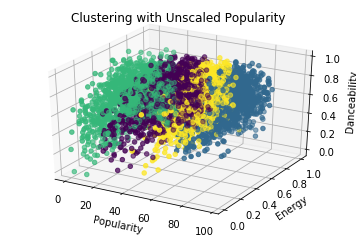

In [306]:
# colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k', 7:'w'}
labels = {0:'Cluster 0', 1:'Cluster 1', 2:'Cluster 2', 3:'Cluster 3', 4:'Cluster 4', 
          5:'Cluster 5', 6:'Cluster 6', 7:'Cluster 7'}
fig = plt.figure()
ax = plt.axes(projection='3d')
# for i in range(0, 4):
#     relevant_df = cluster_df[cluster_df.cluster == i]
#     ax.scatter3D(relevant_df.track_popularity, relevant_df.energy, relevant_df.danceability, c=colors[i])
ax.scatter3D(cluster_df.track_popularity, cluster_df.energy, cluster_df.danceability, c=cluster_df.cluster)
ax.set_xlabel('Popularity')
ax.set_ylabel('Energy')
ax.set_zlabel('Danceability')
plt.title('Clustering with Unscaled Popularity')
# plt.legend()
# ax.text(cluster_df.track_popularity[1340], cluster_df.energy[1340], cluster_df.danceability[1340], 
#         cluster_df.song[1340] + ' by ' + cluster_df.artist[1340], size=10, zorder=1, color='k')
plt.show()

In [307]:
for i in range(0, 4):
    print('Cluster ', i)
    print(cluster_df.groupby('cluster').get_group(i).sort_values('track_popularity', ascending=False).head())

Cluster  0
                  spotify_id                            song           artist  \
3205  1JT8lUbYHP3CMEdGORpS81                   Brighter Days            Mofro   
2987  4rufb5gC7oPNbbC2kfibnp                         Mélodie            4Keus   
3756  2WVWJfPfYJWkjTRLA7O02X            Church Rave In Miami            HONNE   
548   0H3I8PJh0mbJ5tSRleYywg  Kau dan Aku Menuju Ruang Hampa  Efek Rumah Kaca   
2649  0AdSyk7hH7GdUoPSWJmwb5                            Pääh            Xatar   

      track_popularity  energy  danceability  cluster  
3205                41   0.561         0.550        0  
2987                41   0.490         0.788        0  
3756                41   0.502         0.440        0  
548                 41   0.938         0.368        0  
2649                41   0.912         0.719        0  
Cluster  1
                  spotify_id              song          artist  \
2717  3ee8Jmje8o58CHK66QrVC2              SAD!    XXXTENTACION   
476   2XW4DbS6NddZxRPm5

In [308]:
df = spotify_df[['spotify_id', 'track_popularity', 'energy', 'danceability']]
df['track_popularity'] = df['track_popularity'] / 100
df.set_index('spotify_id', inplace=True)
df.head()

/Users/ericdong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,track_popularity,energy,danceability
spotify_id,,,
2NTxalkIR7Yz1nl5iIFWAz,0.64,0.656,0.688
0CHAAuryUJDzzpKmsyT9eP,0.50,0.711,0.389
6pdLyZy6tBN6EAtBegiEKx,0.39,0.638,0.577
7wwljVtXMpKMLIIxxHzUaq,0.55,0.786,0.681
62pKXsRHgqhtGaqTQeDOga,0.41,0.875,0.345


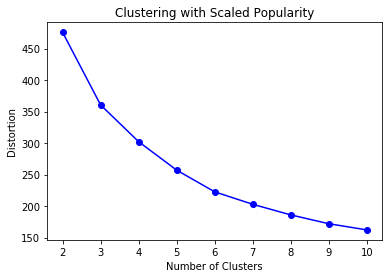

In [309]:
ks = range(2, 11)
distortions = []

for k in ks:
    km = KMeans(k, n_init=30)
    km.fit(df)
    distortions.append(km.inertia_)

plt.plot(ks, distortions, c='blue', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Clustering with Scaled Popularity')
plt.show()

In [310]:
km = KMeans(6)
km.fit(df)
for i in range(0, 6):
    print('Cluster', i, ': Popularity', km.cluster_centers_[i,0], 'Energy', 
          km.cluster_centers_[i,1], 'Danceability', km.cluster_centers_[i,2])

Cluster 0 : Popularity 0.160265017668 Energy 0.304454343286 Danceability 0.466966607774
Cluster 1 : Popularity 0.58688172043 Energy 0.800309139785 Danceability 0.555991935484
Cluster 2 : Popularity 0.640895061728 Energy 0.614772376543 Danceability 0.772686728395
Cluster 3 : Popularity 0.601158989599 Energy 0.41291307578 Danceability 0.510369985141
Cluster 4 : Popularity 0.158963133641 Energy 0.86826843318 Danceability 0.408637327189
Cluster 5 : Popularity 0.208950554995 Energy 0.66158728557 Danceability 0.696434914228


In [311]:
cluster_df = pd.DataFrame()
cluster_df['spotify_id'] = df.index.values
cluster_df['song'] = spotify_df.song
cluster_df['artist'] = spotify_df.artist
cluster_df['track_popularity'] = spotify_df.track_popularity
cluster_df['energy'] = spotify_df.energy
cluster_df['danceability'] = spotify_df.danceability
cluster_df['cluster'] = km.labels_
cluster_df.head()

,spotify_id,song,artist,track_popularity,energy,danceability,cluster
0,2NTxalkIR7Yz1nl5iIFWAz,Ulalala,Achille Lauro,64,0.656,0.688,2
1,0CHAAuryUJDzzpKmsyT9eP,Cenerentola,Achille Lauro,50,0.711,0.389,1
2,6pdLyZy6tBN6EAtBegiEKx,La Bella E La Bestia,Achille Lauro,39,0.638,0.577,5
3,7wwljVtXMpKMLIIxxHzUaq,Non Sei Come Me,Achille Lauro,55,0.786,0.681,1
4,62pKXsRHgqhtGaqTQeDOga,Ora Lo So,Achille Lauro,41,0.875,0.345,4


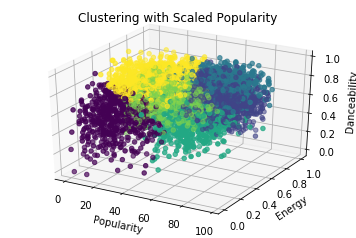

In [312]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(cluster_df.track_popularity, cluster_df.energy, cluster_df.danceability, c=cluster_df.cluster)
ax.set_xlabel('Popularity')
ax.set_ylabel('Energy')
ax.set_zlabel('Danceability')
plt.title('Clustering with Scaled Popularity')
# ax.text(cluster_df.track_popularity[1340], cluster_df.energy[1340], cluster_df.danceability[1340], 
#         cluster_df.song[1340] + ' by ' + cluster_df.artist[1340], size=20, zorder=1, color='k')
plt.show()

In [313]:
for i in range(0, 6):
    print('Cluster ', i)
    print(cluster_df.groupby('cluster').get_group(i).sort_values('track_popularity', ascending=False).head())

Cluster  0
                  spotify_id                                        song  \
3519  1jejcmjkMWyhrR7Hc99Men                                  Confession   
5289  5hbTbKQXJuZ0qFVerk6jRp                            Emerald and Lime   
5149  5lE4bOUxqE8QcC7pIXxk87          Nocturne in B major, Op. 62, No. 1   
4888  4XULalFVCixvzV2GuAQRrt                      All I Could Do Was Cry   
3446  1ZKSu9rMl6ASUKR1BzAQ6M  Serenade of Water (From "Ocarina of Time")   

               artist  track_popularity  energy  danceability  cluster  
3519    Patrick Doyle                48  0.0662        0.1790        0  
5289        Brian Eno                45  0.0983        0.0736        0  
5149  Frédéric Chopin                42  0.0163        0.3430        0  
4888       Etta James                40  0.2330        0.3610        0  
3446     Taylor Davis                40  0.2880        0.1240        0  
Cluster  1
                  spotify_id             song               artist  \
1718  0MIcPSq

In [314]:
df = spotify_df[['spotify_id', 'energy', 'danceability']]
df.set_index('spotify_id', inplace=True)
df.head()

,energy,danceability
spotify_id,,
2NTxalkIR7Yz1nl5iIFWAz,0.656,0.688
0CHAAuryUJDzzpKmsyT9eP,0.711,0.389
6pdLyZy6tBN6EAtBegiEKx,0.638,0.577
7wwljVtXMpKMLIIxxHzUaq,0.786,0.681
62pKXsRHgqhtGaqTQeDOga,0.875,0.345


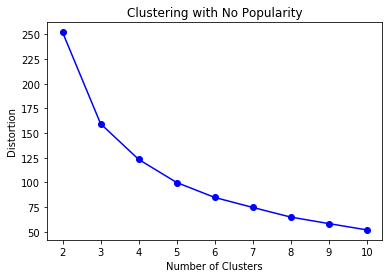

In [315]:
ks = range(2, 11)
distortions = []

for k in ks:
    km = KMeans(k, n_init=30)
    km.fit(df)
    distortions.append(km.inertia_)

plt.plot(ks, distortions, c='blue', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Clustering with No Popularity')
plt.show()

In [316]:
km = KMeans(3)
km.fit(df)
for i in range(0, 3):
    print('Cluster', i, ': Energy', km.cluster_centers_[i,0], 'Danceability', km.cluster_centers_[i,1])

Cluster 0 : Energy 0.643883306321 Danceability 0.737595218801
Cluster 1 : Energy 0.835391375546 Danceability 0.468303056769
Cluster 2 : Energy 0.355248477934 Danceability 0.492743057851


In [317]:
cluster_df = pd.DataFrame()
cluster_df['spotify_id'] = df.index.values
cluster_df['song'] = spotify_df.song
cluster_df['artist'] = spotify_df.artist
cluster_df['track_popularity'] = spotify_df.track_popularity
cluster_df['energy'] = spotify_df.energy
cluster_df['danceability'] = spotify_df.danceability
cluster_df['cluster'] = km.labels_
cluster_df.head()

,spotify_id,song,artist,track_popularity,energy,danceability,cluster
0,2NTxalkIR7Yz1nl5iIFWAz,Ulalala,Achille Lauro,64,0.656,0.688,0
1,0CHAAuryUJDzzpKmsyT9eP,Cenerentola,Achille Lauro,50,0.711,0.389,1
2,6pdLyZy6tBN6EAtBegiEKx,La Bella E La Bestia,Achille Lauro,39,0.638,0.577,0
3,7wwljVtXMpKMLIIxxHzUaq,Non Sei Come Me,Achille Lauro,55,0.786,0.681,0
4,62pKXsRHgqhtGaqTQeDOga,Ora Lo So,Achille Lauro,41,0.875,0.345,1


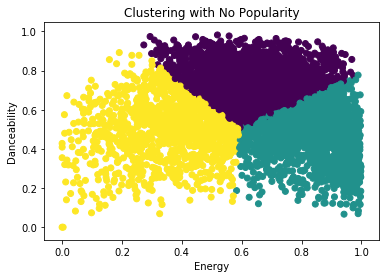

In [318]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(cluster_df.energy, cluster_df.danceability, c=cluster_df.cluster)
ax.set_xlabel('Energy')
ax.set_ylabel('Danceability')
plt.title('Clustering with No Popularity')
plt.show()

In [319]:
for i in range(0, 3):
    print('Cluster ', i)
    print(cluster_df.groupby('cluster').get_group(i).sort_values('track_popularity', ascending=False).head())

Cluster  0
                  spotify_id                  song          artist  \
476   2XW4DbS6NddZxRPm5rMCeY            God's Plan           Drake   
2717  3ee8Jmje8o58CHK66QrVC2                  SAD!    XXXTENTACION   
2111  79jX8RM5CgPqDKdGEKNW9K           In My Blood    Shawn Mendes   
252   1rfofaqEpACxVEHIZBJe6W                Havana  Camila Cabello   
69    5SxkdsY1ufZzoq9iXceLw9  No Tears Left to Cry   Ariana Grande   

      track_popularity  energy  danceability  cluster  
476                 97   0.454         0.753        0  
2717                97   0.613         0.740        0  
2111                95   0.715         0.628        0  
252                 95   0.523         0.765        0  
69                  95   0.696         0.703        0  
Cluster  1
                  spotify_id              song        artist  \
2557  4MPTj8lMMvxLwT3EwuXFop  Call Out My Name    The Weeknd   
1718  0MIcPSq9n2z5H8TAfEstri    Quiero Repetir         Ozuna   
1178  45aBsnKRWUzhwbcqOJLwfe 